In [222]:
import pandas as pd
import numpy as np
from sklearn import neighbors, linear_model, model_selection, metrics
import seaborn as sns

In [223]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

In [224]:
df = pd.read_csv('preprocessed_data_craigslist.csv').drop(
    ['Unnamed: 0', 'text', 'url', 'title', 'date', 'days', 'location'], axis=1).drop_duplicates(subset=None, keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 0 to 3584
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 2469 non-null   float64
 1   numimage              2469 non-null   float64
 2   condition             2469 non-null   object 
 3   makemanufacturer      2469 non-null   float64
 4   modelnamenumber       2469 non-null   float64
 5   bicycleframematerial  2469 non-null   object 
 6   bicycletype           2469 non-null   object 
 7   braketype             2469 non-null   object 
 8   electricassist        2469 non-null   float64
 9   framesize             2469 non-null   object 
 10  handlebartype         2469 non-null   object 
 11  suspension            2469 non-null   float64
 12  wheelsize             2469 non-null   object 
 13  sizedimensions        2469 non-null   int64  
 14  serialnumber          2469 non-null   int64  
 15  paintcolor           

In [225]:
df = df[(30 < df.price) & (df.price < 1000)
        ].reset_index().drop(['index'], axis=1)
df

,price,numimage,condition,makemanufacturer,modelnamenumber,bicycleframematerial,bicycletype,braketype,electricassist,framesize,handlebartype,suspension,wheelsize,sizedimensions,serialnumber,paintcolor,yearmanufactured
0,112.0,4.0,4,1.0,1.0,unknown,unknown,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0
1,167.0,7.0,4,1.0,0.0,unknown,unknown,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0
2,125.0,9.0,3,1.0,1.0,aluminum,mountain,special,0.0,2,special,1.0,26,0,0,0,0
3,75.0,0.0,1,0.0,0.0,aluminum,mountain,mechanical,0.0,unknown,unknown,0.0,unknown,0,0,0,0
4,500.0,0.0,unknown,0.0,0.0,unknown,unknown,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,500.0,6.0,4,1.0,1.0,unknown,unknown,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0
1337,75.0,2.0,unknown,1.0,1.0,unknown,unknown,unknown,0.0,3,unknown,0.0,26,0,0,0,0
1338,100.0,2.0,2,1.0,1.0,aluminum,mountain,mechanical,0.0,3,unknown,0.0,24,0,1,0,0
1339,110.0,10.0,3,1.0,0.0,unknown,unknown,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0


In [226]:
pd.get_dummies(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              1341 non-null   float64
 1   numimage                           1341 non-null   float64
 2   makemanufacturer                   1341 non-null   float64
 3   modelnamenumber                    1341 non-null   float64
 4   electricassist                     1341 non-null   float64
 5   suspension                         1341 non-null   float64
 6   sizedimensions                     1341 non-null   int64  
 7   serialnumber                       1341 non-null   int64  
 8   paintcolor                         1341 non-null   int64  
 9   yearmanufactured                   1341 non-null   int64  
 10  condition_1                        1341 non-null   uint8  
 11  condition_2                        1341 non-null   uint8

In [227]:
X = pd.get_dummies(df.drop(columns=['price']))
display(X)
y = df.price

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25,random_state=52)

,numimage,makemanufacturer,modelnamenumber,electricassist,suspension,sizedimensions,serialnumber,paintcolor,yearmanufactured,condition_1,...,wheelsize_16,wheelsize_18,wheelsize_20,wheelsize_24,wheelsize_25,wheelsize_26,wheelsize_27,wheelsize_28,wheelsize_29,wheelsize_unknown
0,4.0,1.0,1.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7.0,1.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9.0,1.0,1.0,0.0,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,6.0,1.0,1.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1337,2.0,1.0,1.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1338,2.0,1.0,1.0,0.0,0.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1339,10.0,1.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Preprocessing (tentative de scaling)

In [228]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled, columns=X_test.columns)

X_train, X_test

(      numimage  makemanufacturer  modelnamenumber  electricassist  suspension  \
 0     0.708333               0.0              0.0             0.0         0.0   
 1     0.375000               1.0              1.0             0.0         0.0   
 2     0.541667               1.0              1.0             0.0         0.0   
 3     0.000000               0.0              0.0             0.0         0.0   
 4     0.000000               1.0              1.0             0.0         0.0   
 ...        ...               ...              ...             ...         ...   
 1000  0.208333               1.0              0.0             0.0         1.0   
 1001  0.166667               1.0              1.0             0.0         0.0   
 1002  0.125000               0.0              0.0             0.0         0.0   
 1003  0.000000               1.0              1.0             0.0         0.0   
 1004  0.916667               1.0              0.0             0.0         0.0   
 
       sizedim

# Linear Regression

In [229]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(X_train, y_train)

LinearRegression()

In [230]:
linear_regression.intercept_

692305993596218.8

In [231]:
linear_regression.coef_

array([ 1.30297640e+02, -2.99616623e+00,  5.18365608e+01,  3.40591525e+02,
       -6.02648948e+01, -1.58497629e+02, -1.60685416e+02,  2.92943903e+02,
        8.43785545e+01, -1.21221561e+14, -1.21221561e+14, -1.21221561e+14,
       -1.21221561e+14, -1.21221561e+14, -5.90033955e+13, -5.90033955e+13,
       -5.90033955e+13, -5.90033955e+13, -5.90033955e+13, -5.90033955e+13,
       -5.90033955e+13, -5.90033955e+13,  5.04257326e+13,  5.04257326e+13,
        5.04257326e+13,  5.04257326e+13,  5.04257326e+13,  5.04257326e+13,
        5.04257326e+13,  5.04257326e+13,  5.04257326e+13,  5.04257326e+13,
        5.04257326e+13,  5.04257326e+13,  5.04257326e+13,  5.04257326e+13,
        5.04257326e+13, -1.70346992e+14, -1.70346992e+14, -1.70346992e+14,
       -1.70346992e+14,  2.77175447e+14,  2.77175447e+14,  2.77175447e+14,
        2.77175447e+14, -6.48800986e+14, -6.48800986e+14, -2.05342391e+13,
       -2.05342391e+13, -2.05342391e+13, -2.05342391e+13, -2.05342391e+13,
       -2.05342391e+13, -

In [232]:
y_pred = linear_regression.predict(X_test)
print('Coefficients: \n', linear_regression.coef_, len(linear_regression.coef_))
# The mean squared error
print("RMSE: %.2f" %
      sqrt(np.mean((linear_regression.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linear_regression.score(X_test, y_test))

Coefficients: 
 [ 1.30297640e+02 -2.99616623e+00  5.18365608e+01  3.40591525e+02
 -6.02648948e+01 -1.58497629e+02 -1.60685416e+02  2.92943903e+02
  8.43785545e+01 -1.21221561e+14 -1.21221561e+14 -1.21221561e+14
 -1.21221561e+14 -1.21221561e+14 -5.90033955e+13 -5.90033955e+13
 -5.90033955e+13 -5.90033955e+13 -5.90033955e+13 -5.90033955e+13
 -5.90033955e+13 -5.90033955e+13  5.04257326e+13  5.04257326e+13
  5.04257326e+13  5.04257326e+13  5.04257326e+13  5.04257326e+13
  5.04257326e+13  5.04257326e+13  5.04257326e+13  5.04257326e+13
  5.04257326e+13  5.04257326e+13  5.04257326e+13  5.04257326e+13
  5.04257326e+13 -1.70346992e+14 -1.70346992e+14 -1.70346992e+14
 -1.70346992e+14  2.77175447e+14  2.77175447e+14  2.77175447e+14
  2.77175447e+14 -6.48800986e+14 -6.48800986e+14 -2.05342391e+13
 -2.05342391e+13 -2.05342391e+13 -2.05342391e+13 -2.05342391e+13
 -2.05342391e+13 -2.05342391e+13 -2.05342391e+13 -2.05342391e+13
 -2.05342391e+13 -2.05342391e+13 -2.05342391e+13 -2.05342391e+13] 60
RMSE:

In [233]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred = df_pred[(df_pred['Predicted'] > 20) & (df_pred['Predicted'] < 2000)]
df_pred

,Actual,Predicted
231,70.0,180.500
179,40.0,290.375
308,100.0,250.750
1314,70.0,259.500
143,750.0,329.750
...,...,...
486,60.0,328.375
177,100.0,227.625
954,200.0,168.500
96,99.0,224.125


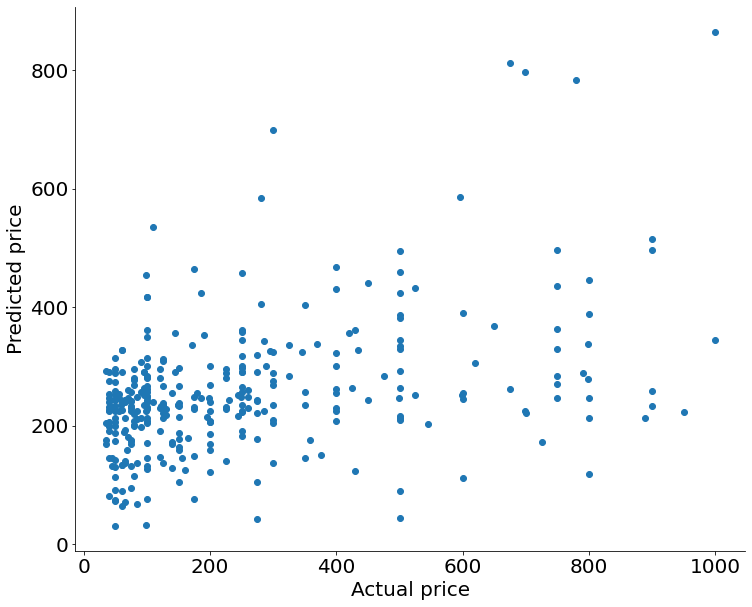

In [234]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(df_pred['Actual'], df_pred['Predicted'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)

sns.despine()

<AxesSubplot:>

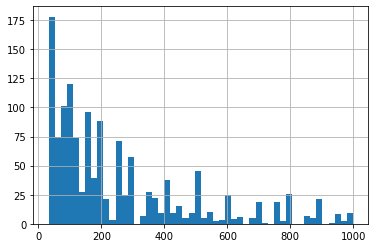

In [235]:
df['price'].hist(bins=50)

In [236]:
#import statsmodels.api as sm
# X_train = sm.add_constant(X_train) # adding a constant
# X_test = sm.add_constant(X_test) # adding a constant
#
#
#model = sm.OLS(y_train, X_train).fit()
#predictions = model.predict(X_test)
#
#print_model = model.summary()
# print(print_model)

# KNN

In [237]:
rmse_val = []  # to store rmse values for different k
for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(X_train, y_train)  # fit the model
    pred = model.predict(X_test)  # make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred))  # calculate rmse
    rmse_val.append(error)  # store rmse values
fit_df = pd.DataFrame({'k': range(1, 41), 'RMSE': rmse_val}).set_index('k')
display(fit_df)
best_k = int(fit_df.idxmin())
best_k

,RMSE
k,
1,272.260871
2,239.193754
3,228.222301
4,227.154912
5,222.298158
6,216.465557
7,216.250275
8,216.699018
9,214.428474


37

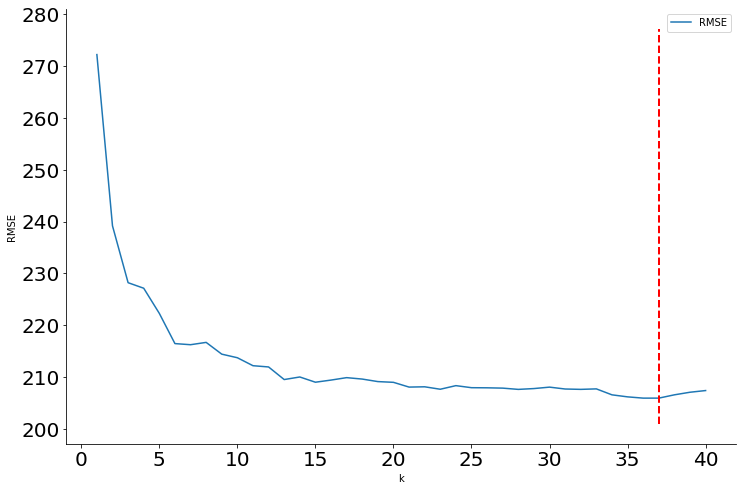

In [238]:
fit_df.plot(ylabel='RMSE', figsize=[12, 8], fontsize=20)
plt.plot([best_k, best_k], [fit_df['RMSE'].min()-5, fit_df['RMSE'].max()+5], color='red',
         linestyle='dashed', linewidth=2)

sns.despine()

In [239]:
model = neighbors.KNeighborsRegressor(n_neighbors=best_k)
model.fit(X_train, y_train)  # fit the model
pred_KNN = model.predict(X_test)

In [240]:
df_pred_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': pred_KNN})
df_pred_KNN = df_pred_KNN[(df_pred_KNN['Predicted'] > 20) & (
    df_pred_KNN['Predicted'] < 2000)]
df_pred_KNN

,Actual,Predicted
231,70.0,156.324324
179,40.0,256.810811
308,100.0,196.189189
1314,70.0,221.513514
143,750.0,381.702703
...,...,...
486,60.0,271.162162
177,100.0,206.432432
954,200.0,200.135135
96,99.0,239.621622


In [241]:
# Linear Regression vs KNN
print('RMSE for linear regression : ', sqrt(
    mean_squared_error(y_test, y_pred)))
print('RMSE for KNN with best K : ', sqrt(
    mean_squared_error(y_test, pred_KNN)))

RMSE for linear regression :  208.05406945006422
RMSE for KNN with best K :  205.9368940754797


# Random Forest Regression

In [242]:
#from sklearn.model_selection import GridSearchCV
#
# grid = {
#    'n_estimators': [200,300,400,500],
#    'max_features': ['sqrt','log2'],
#    'max_depth' : [3,4,5,6,7],
#    'random_state' : [52]
# }
# Grid Search function
#CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
#CV_rfr.fit(X_train, y_train)
#

In [243]:
# CV_rfr.best_params_

# Output is :

'''
{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'random_state': 52}
 '''

"\n{'max_depth': 7,\n 'max_features': 'sqrt',\n 'n_estimators': 500,\n 'random_state': 52}\n "

In [244]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, max_features='sqrt',
                           max_depth=7, random_state=52).fit(X_train, y_train)
pred_RF = rf.predict(X_test)
mse = mean_squared_error(y_test, pred_RF)
rmse = mse**.5
print(rmse)

204.6497931739455


In [245]:
df_pred_RF = pd.DataFrame({'Actual': y_test, 'Predicted': pred_RF})
df_pred_RF = df_pred_RF[(df_pred_RF['Predicted'] > 20)
                        & (df_pred_RF['Predicted'] < 2000)]
df_pred_RF

,Actual,Predicted
231,70.0,215.844256
179,40.0,232.777222
308,100.0,217.221284
1314,70.0,227.158632
143,750.0,342.138100
...,...,...
486,60.0,303.705057
177,100.0,225.160606
954,200.0,210.739484
96,99.0,223.720178


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

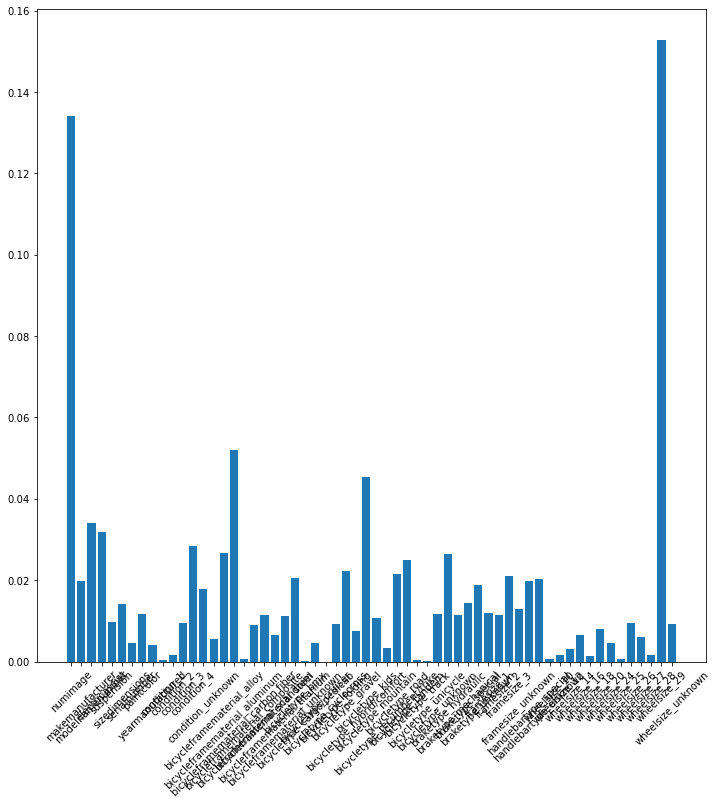

In [254]:
plt.figure(figsize=(12,12))
plt.bar(X_train.columns, rf.feature_importances_)
plt.xticks(rotation=45)

# Sum-up

In [246]:
# Linear Regression vs KNN vs RF
print('RMSE for linear regression : ', sqrt(
    mean_squared_error(y_test, y_pred)))
print('RMSE for KNN with best K : ', sqrt(
    mean_squared_error(y_test, pred_KNN)))
print('RMSE for RF with best params : ', sqrt(
    mean_squared_error(y_test, pred_RF)))


RMSE for linear regression :  208.05406945006422
RMSE for KNN with best K :  205.9368940754797
RMSE for RF with best params :  204.6497931739455


In [247]:
df_pred_sum_up = pd.DataFrame({'Actual': y_test,'Predicted with Linear Regression':y_pred,'Predicted with KNN k ='+str(best_k):pred_KNN,'Predicted with Random Forest': pred_RF})
average_pred = df_pred_sum_up.drop("Actual",axis=1).mean(axis=1)
df_pred_sum_up['Average']=average_pred

df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with Linear Regression'] > 20)
                        & (df_pred_sum_up['Predicted with Linear Regression'] < 2000)]
df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with KNN k ='+str(best_k)] > 20)
                        & (df_pred_sum_up['Predicted with KNN k ='+str(best_k)] < 2000)]
df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with Random Forest'] > 20)
                        & (df_pred_sum_up['Predicted with Random Forest'] < 2000)]

df_pred_sum_up.reset_index().drop('index',axis=1)

,Actual,Predicted with Linear Regression,Predicted with KNN k =37,Predicted with Random Forest,Average
0,70.0,180.500,156.324324,215.844256,184.222860
1,40.0,290.375,256.810811,232.777222,259.987678
2,100.0,250.750,196.189189,217.221284,221.386824
3,70.0,259.500,221.513514,227.158632,236.057382
4,750.0,329.750,381.702703,342.138100,351.196934
...,...,...,...,...,...
328,60.0,328.375,271.162162,303.705057,301.080740
329,100.0,227.625,206.432432,225.160606,219.739346
330,200.0,168.500,200.135135,210.739484,193.124873
331,99.0,224.125,239.621622,223.720178,229.155600


In [248]:
print('RMSE for Average : ', sqrt(
    mean_squared_error(y_test, average_pred)))

RMSE for Average :  202.25167504919472


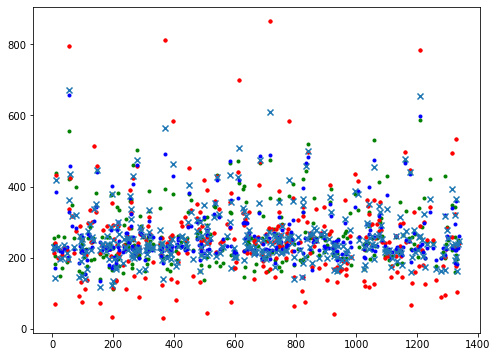

In [253]:
x = df_pred_sum_up.index

fig = plt.figure(figsize=(8,6))  #setting the figure size
plt.scatter(x, df_pred_sum_up['Predicted with Linear Regression'],marker='.',color='r') 

plt.scatter(x, df_pred_sum_up['Predicted with KNN k ='+str(best_k)],marker='.',color='g') 
plt.scatter(x, df_pred_sum_up['Predicted with Linear Regression'],marker='.',color='r') 
plt.scatter(x, df_pred_sum_up['Predicted with Random Forest'],marker='.',color='b') 
plt.scatter(x,df_pred_sum_up['Average'],marker='x')

plt.show()